# **Impact of COVID-19 on Students - EDA**
COVID-19 pandemic has drastically affected the life of students. All the way from classroom learning to the online classes in the lockdown, their lifestyle has changed dramatically.
Here we are trying to understand the impact on a small data with few samples.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv


## **Load the data**

In [2]:
df = pd.read_csv("/kaggle/input/covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv")
print (df.shape)
df.head()

(1182, 19)


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


## **Pre-Processing of the data**

In [3]:
df['Time spent on TV'].replace('No tv', 0, inplace=True)
df['Time spent on TV'].replace('n', 0, inplace=True)
df['Time spent on TV'].replace('N', 0, inplace=True)
df['Time spent on TV'].replace(' ', 0, inplace=True)
df['Time spent on TV'] = df['Time spent on TV'].astype('float')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('None ', 'None')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp')

# **EDA and Visualisation**

## **1. Knowing about the Subjects**

### **1.1. Which region they belong to?**

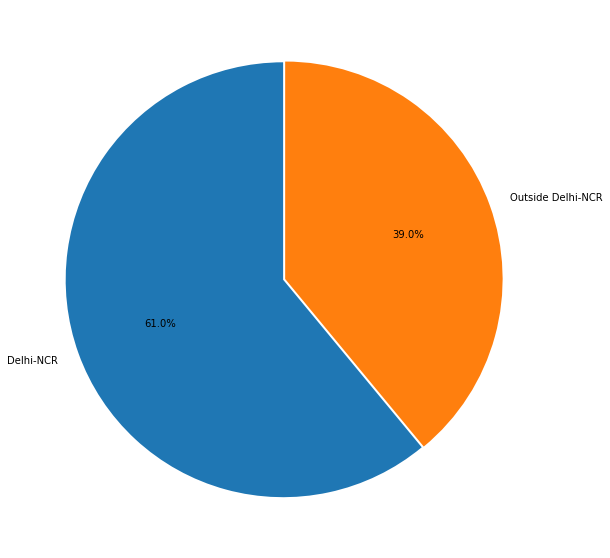

In [4]:
dict_ = df['Region of residence'].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', 
        startangle=90, explode = [0.01, 0])
plt.show()

### **1.2. What is the agewise distribution?**

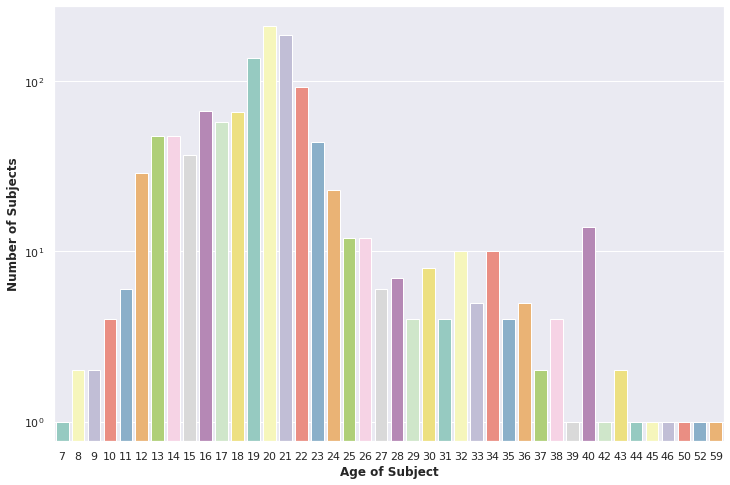

In [5]:
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.countplot(x='Age of Subject', data=df, palette='Set3')
plt.yscale('log')
plt.xlabel('Age of Subject', weight='bold')
plt.ylabel('Number of Subjects', weight='bold')
plt.show()

### **1.3. What devices they use for online learning**

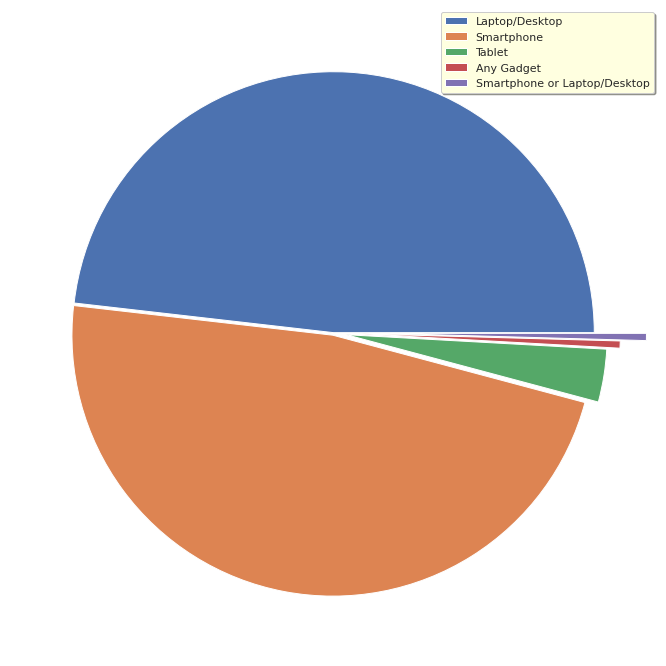

In [6]:
dict_ = df['Medium for online class'].value_counts().to_dict()
plt.figure(figsize=(12,12))
plt.pie(x=dict_.values(),
        startangle=0, explode=[0, 0.01, 0.05, 0.1, 0.2])
plt.legend(labels=dict_.keys(), loc='upper right',shadow=True, facecolor='lightyellow')
plt.show()

### **1.4. How they spent their time?**

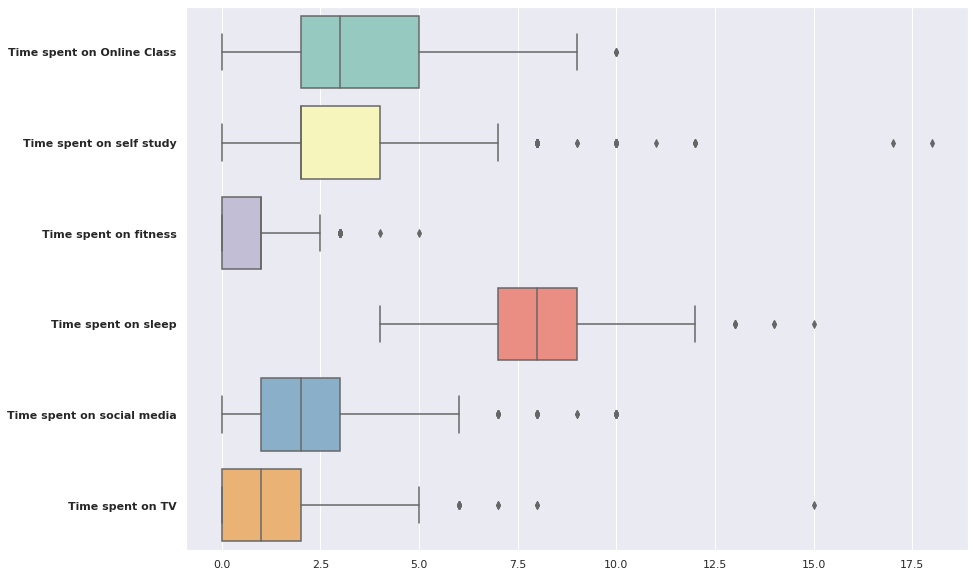

In [7]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
sns.boxplot(data=df[['Time spent on Online Class','Time spent on self study','Time spent on fitness',
                    'Time spent on sleep','Time spent on social media', 'Time spent on TV']],
             orient='h', palette='Set3')
plt.yticks(weight='bold')
plt.show()

### **1.5. What is their preferred social media platform?** 

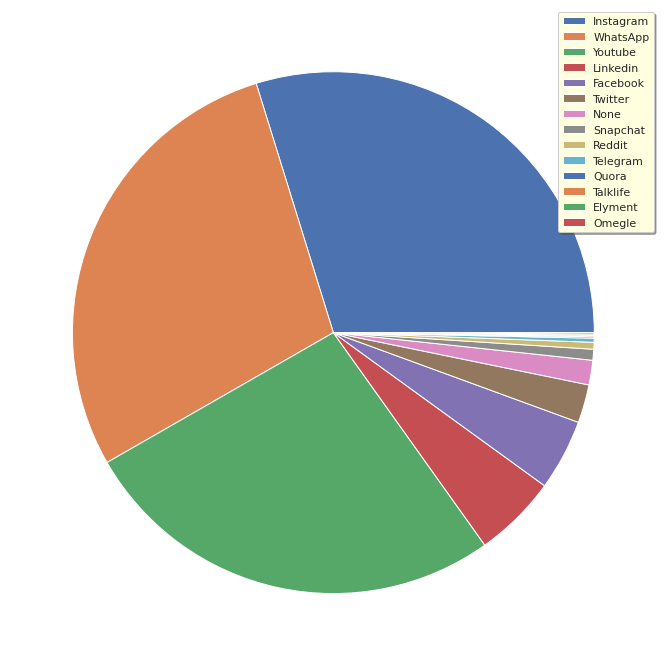

In [8]:
dict_ = df['Prefered social media platform'].value_counts().to_dict()
plt.figure(figsize=(12,12))
plt.pie(x=dict_.values(), startangle=0)
plt.legend(labels=dict_.keys(), loc='upper right',shadow=True, facecolor='lightyellow')
plt.show()

### **1.6. What is their favourite stress buster?**

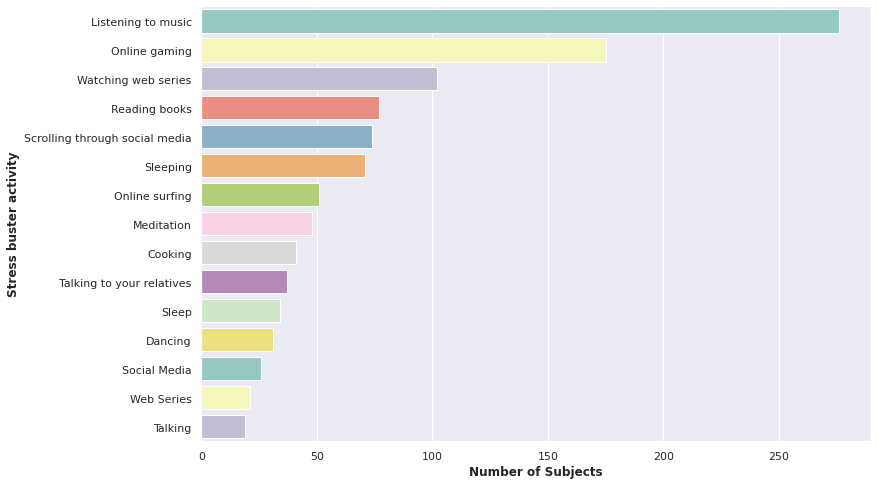

In [9]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='Stress busters', data=df, order=df['Stress busters'].value_counts().index[:15], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("Stress buster activity", weight='bold')
plt.show()

### **1.7. What did they miss the most?**

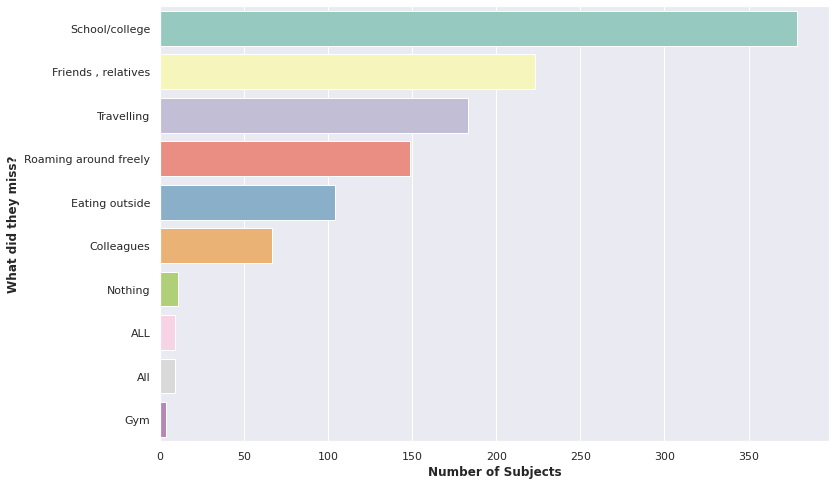

In [10]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='What you miss the most', data=df, order=df['What you miss the most'].value_counts().index[:10], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("What did they miss?", weight='bold')
plt.show()

## **2. How their health has been impacted by various factors?**

### **2.1. The activities they spent their time on?**

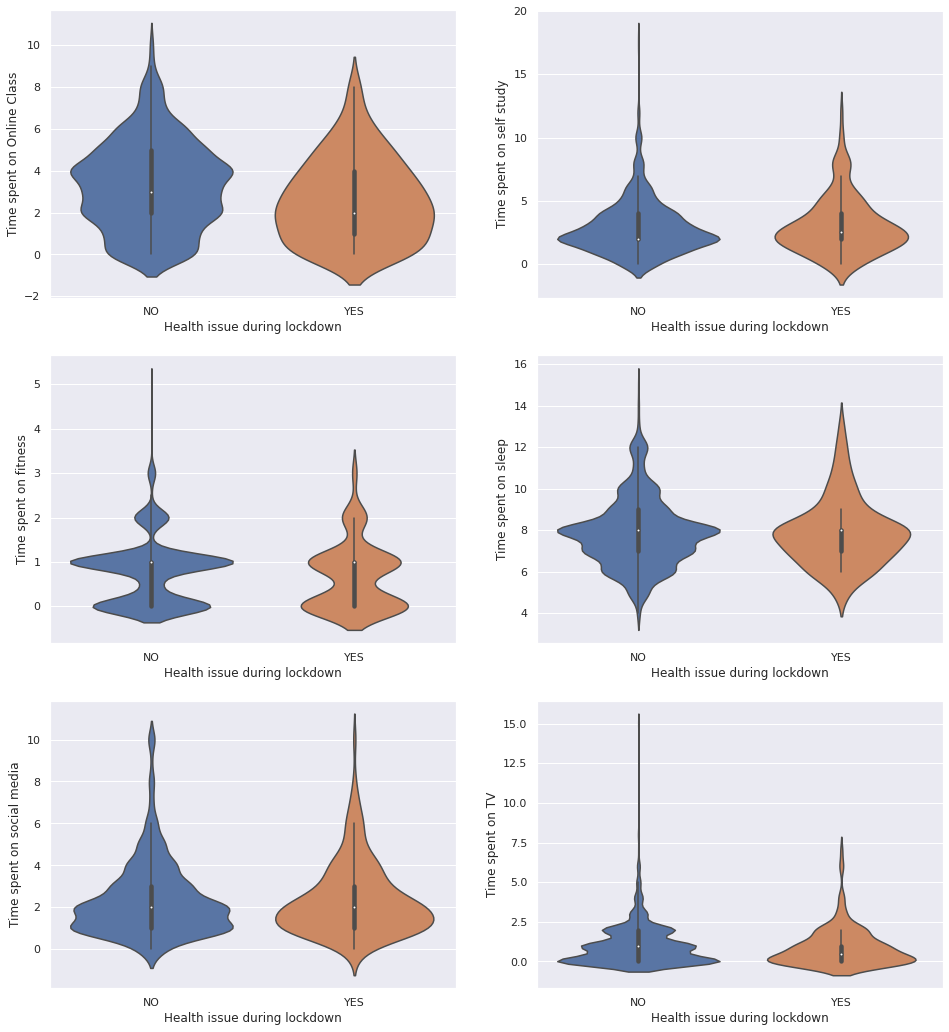

In [11]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(16,18))
sns.violinplot(x='Health issue during lockdown', y='Time spent on Online Class', data=df, ax=ax[0,0])
sns.violinplot(x='Health issue during lockdown', y='Time spent on self study', data=df, ax=ax[0,1])
sns.violinplot(x='Health issue during lockdown', y='Time spent on fitness', data=df, ax=ax[1,0])
sns.violinplot(x='Health issue during lockdown', y='Time spent on sleep', data=df, ax=ax[1,1])
sns.violinplot(x='Health issue during lockdown', y='Time spent on social media', data=df, ax=ax[2,0])
sns.violinplot(x='Health issue during lockdown', y='Time spent on TV', data=df, ax=ax[2,1])
plt.show()

### **2.2 On their respective age?**

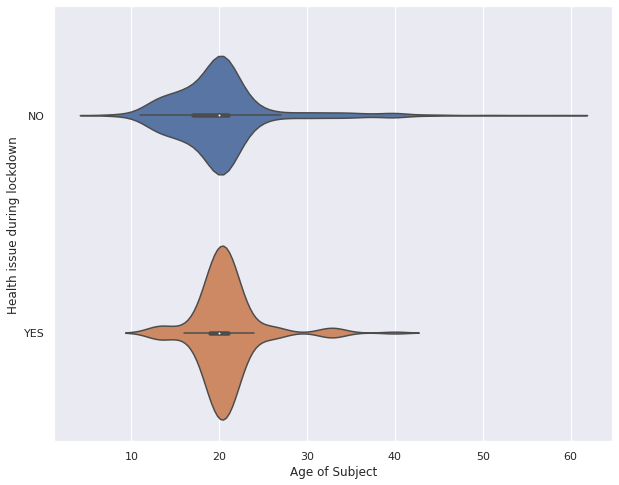

In [12]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.violinplot(y='Health issue during lockdown', x='Age of Subject', data=df)
plt.show()

### **2.3. On the number of meals they had?**

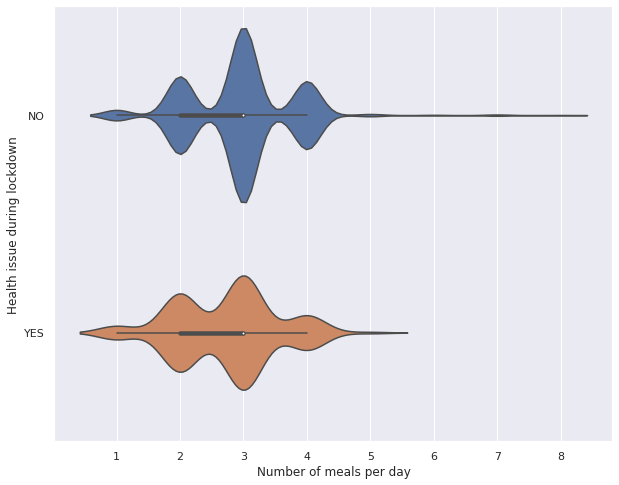

In [13]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.violinplot(y='Health issue during lockdown', x='Number of meals per day', data=df)
plt.show()

## **3. Does number of meals affect their weight?**

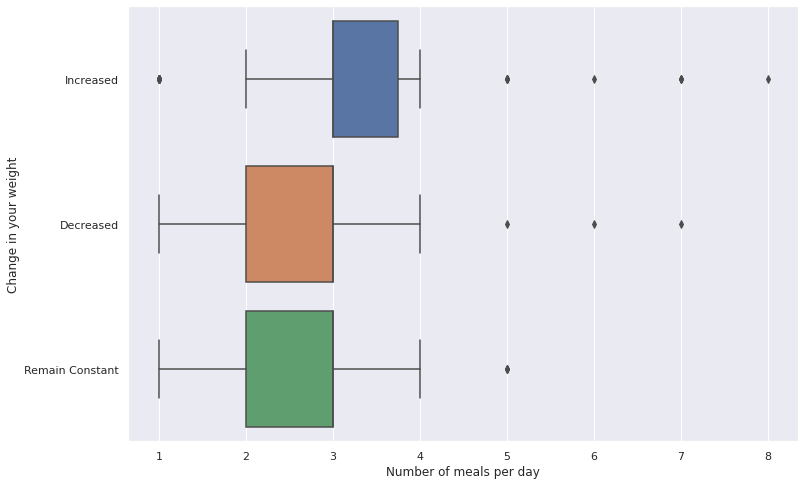

In [14]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(y='Change in your weight', x='Number of meals per day', data=df)
plt.show()

## **4. How they utilised their time?**

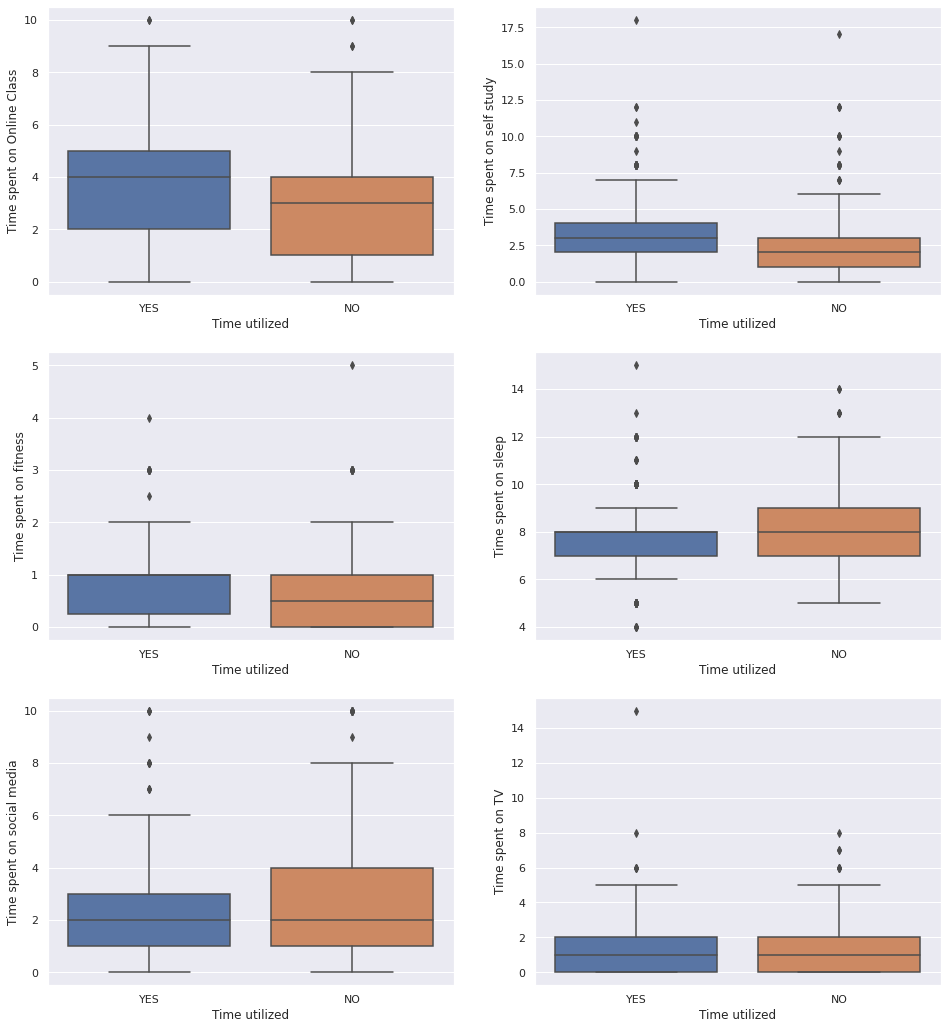

In [15]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(16,18))
sns.boxplot(x='Time utilized', y='Time spent on Online Class', data=df, ax=ax[0,0])
sns.boxplot(x='Time utilized', y='Time spent on self study', data=df, ax=ax[0,1])
sns.boxplot(x='Time utilized', y='Time spent on fitness', data=df, ax=ax[1,0])
sns.boxplot(x='Time utilized', y='Time spent on sleep', data=df, ax=ax[1,1])
sns.boxplot(x='Time utilized', y='Time spent on social media', data=df, ax=ax[2,0])
sns.boxplot(x='Time utilized', y='Time spent on TV', data=df, ax=ax[2,1])
plt.show()

## **5. Heatmap (correlation) among numerical features**

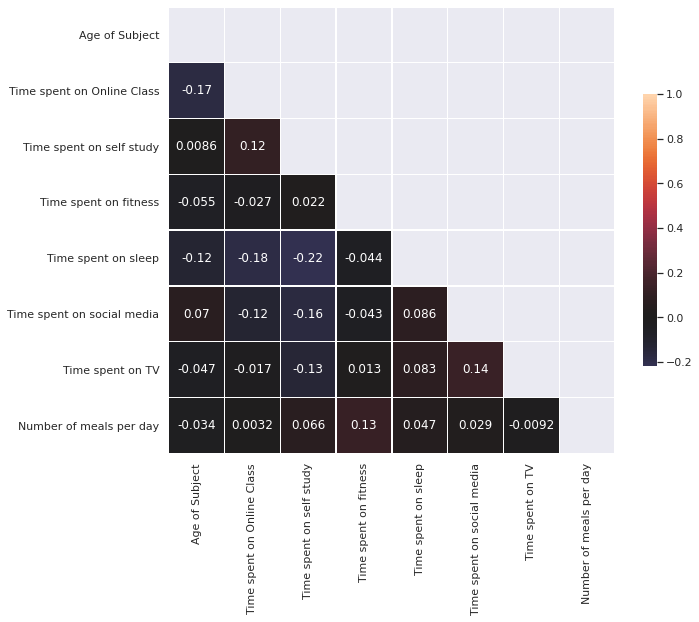

In [16]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# **Feel free to Upvote and give your Feedbacks**